# 3. Ridge Regression

##### Krishna Penukonda
##### 1001781

## Instructions

1. Ensure that the `data` folder is in the same directory as this notebook and contains `3/hw1_ridge_y.dat` and `3/hw1_ridge_x.dat`
2. Run all cells

In [1]:
!pip install numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Load Data

In [3]:
FEATURES_FILE = 'data/3/hw1_ridge_x.dat'
LABELS_FILE = 'data/3/hw1_ridge_y.dat'

In [12]:
features = pd.read_csv(FEATURES_FILE, names=['x1', 'x2', 'x3', 'x4'])
labels = pd.read_csv(LABELS_FILE, names='y')
data = features.join(labels)
data.head()

,x1,x2,x3,x4,y
0,-1.477524,-0.050253,-0.170236,1,-1.139331
1,0.907090,0.664516,0.478651,1,-1.389563
2,0.400322,0.432674,-0.435048,1,-1.464279
3,-1.653651,0.126796,1.002368,1,-0.771402
4,-1.066913,-0.838428,-0.348881,1,-2.454519


## Visualize Data

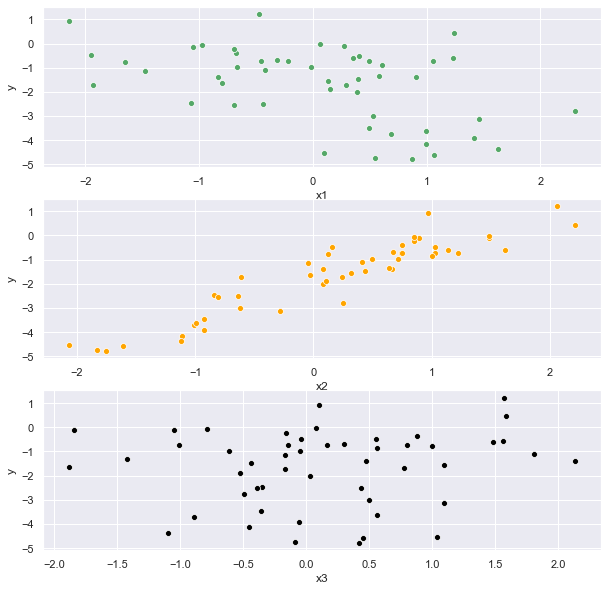

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(311)
sns.scatterplot('x1', 'y', data=data, color='g')
plt.subplot(312)
sns.scatterplot('x2', 'y', data=data, color='orange')
plt.subplot(313)
sns.scatterplot('x3', 'y', data=data, color='black')
plt.show()

## Split Training and Validation Data

In [14]:
x_val, x_train = np.split(features.to_numpy(), [10])
y_val, y_train = np.split(labels.to_numpy(), [10])

## Perform Ridge Regression

In [23]:
def ridge_regress(features, labels, l2):
    x = features
    W = np.linalg.inv(len(x) * l2 * np.eye(x.shape[-1]) + x.T.dot(x)).dot(x.T).dot(labels)
    return W

#### Ridge Regression With $\lambda$ = 0.15

In [15]:
weights = ridge_regress(x_train, y_train, 0.15)
print(f"Weights: {weights}")

Weights: [[-0.57939825]
 [ 1.15033028]
 [ 0.04934122]
 [-1.59867896]]


## Determining the Optimal Value of $\lambda$

In [9]:
def mse(x, w, y):
    return np.sum((x.dot(w) - y) ** 2)  / (2 * len(x))

In [40]:
lambdas = np.power(10, -np.arange(0, 5, 0.1))[::-1]
n_train = len(x_train)
n_val = len(x_val)
weights = [ridge_regress(x_train, y_train, l) for l in lambdas]
train_loss = [mse(x_train, w, y_train) for w in weights]
val_loss = [mse(x_val, w, y_val) for w in weights]

If we assume the best value of $\lambda$ to be the value at which `val_loss` is minimized, we can determine the optimal value of $\lambda$ as follows:

In [41]:
best_lambda = lambdas[np.argmin(np.array(val_loss))]
print(f"Best λ: {best_lambda}")

Best λ: 0.012589254117941668


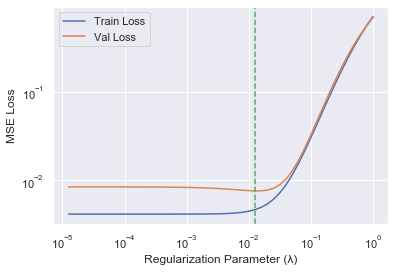

In [42]:
ax = sns.lineplot(lambdas, train_loss, label='Train Loss')
ax = sns.lineplot(lambdas, val_loss, label='Val Loss')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Regularization Parameter (λ)')
ax.set_ylabel('MSE Loss')
ax.axvline(best_lambda, color='g', linestyle='--')
plt.legend()
plt.show()